# Bike sharing Case Study

Problem Statement: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

To create a linear model that quantitatively relates the demand for shared bikes with the available independent variables.__

## The steps to be followed in this case study are as follows:
1.Reading, understanding and visualising the data.

2.Preparing the data for modelling(train-test split, rescaling etc.)

3.Training the model

4.Residual analysis

5.Predictions and evaluation on the test set

## Step 1: Reading, understanding and visualising the data

In [183]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [184]:
#import the useful libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',100)

In [185]:
#read the dataset
dfday=pd.read_csv("day.csv")

In [186]:
## Check the first 5 rows of the dataset
dfday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
#Check the structure of data frame
print(dfday.shape)
print(dfday.columns)
print(dfday.size)
print(dfday.dtypes)
print(dfday.axes)
print(dfday.ndim)
print(dfday.values)
print(dfday.describe())

(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
11680
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
[RangeIndex(start=0, stop=730, step=1), Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')]
2
[[1 '01-01-2018' 1 ... 331 654 985]
 [2 '02-01-2018' 1 ... 131 670 801]
 [3 '03-01-2018' 1 ... 120 1229 1349]
 ...
 [728 '29-12-2019' 1 ... 159 1182 1341]
 [729 

In [188]:
dfday.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [189]:
#summary of the numerical columns in the dataframe
dfday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

In [190]:
# Checking Correlations for all the variables

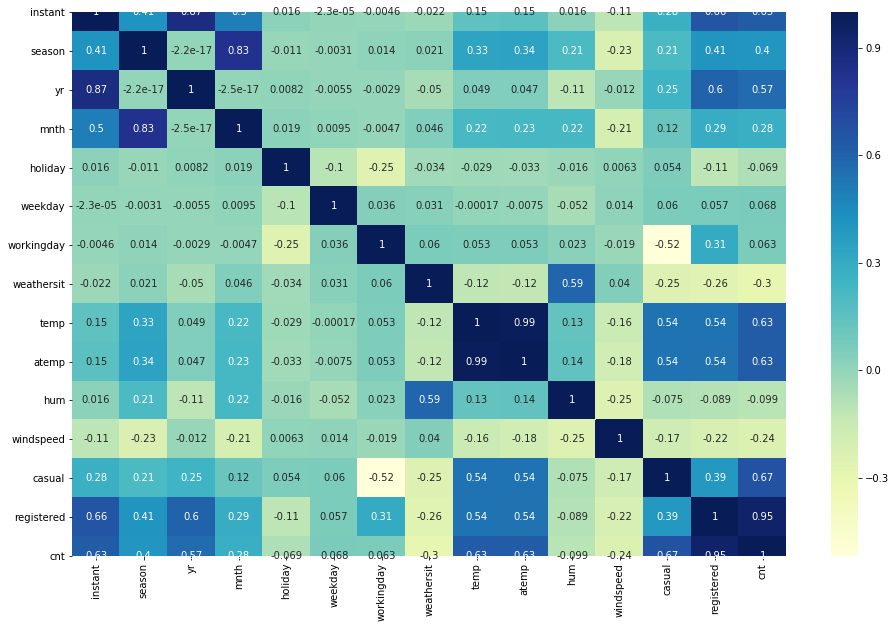

In [191]:
plt.figure(figsize = (16, 10))
sns.heatmap(dfday.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [192]:
# Visualising Numeric Variables. Lets make a pairplot of all numerical variables.

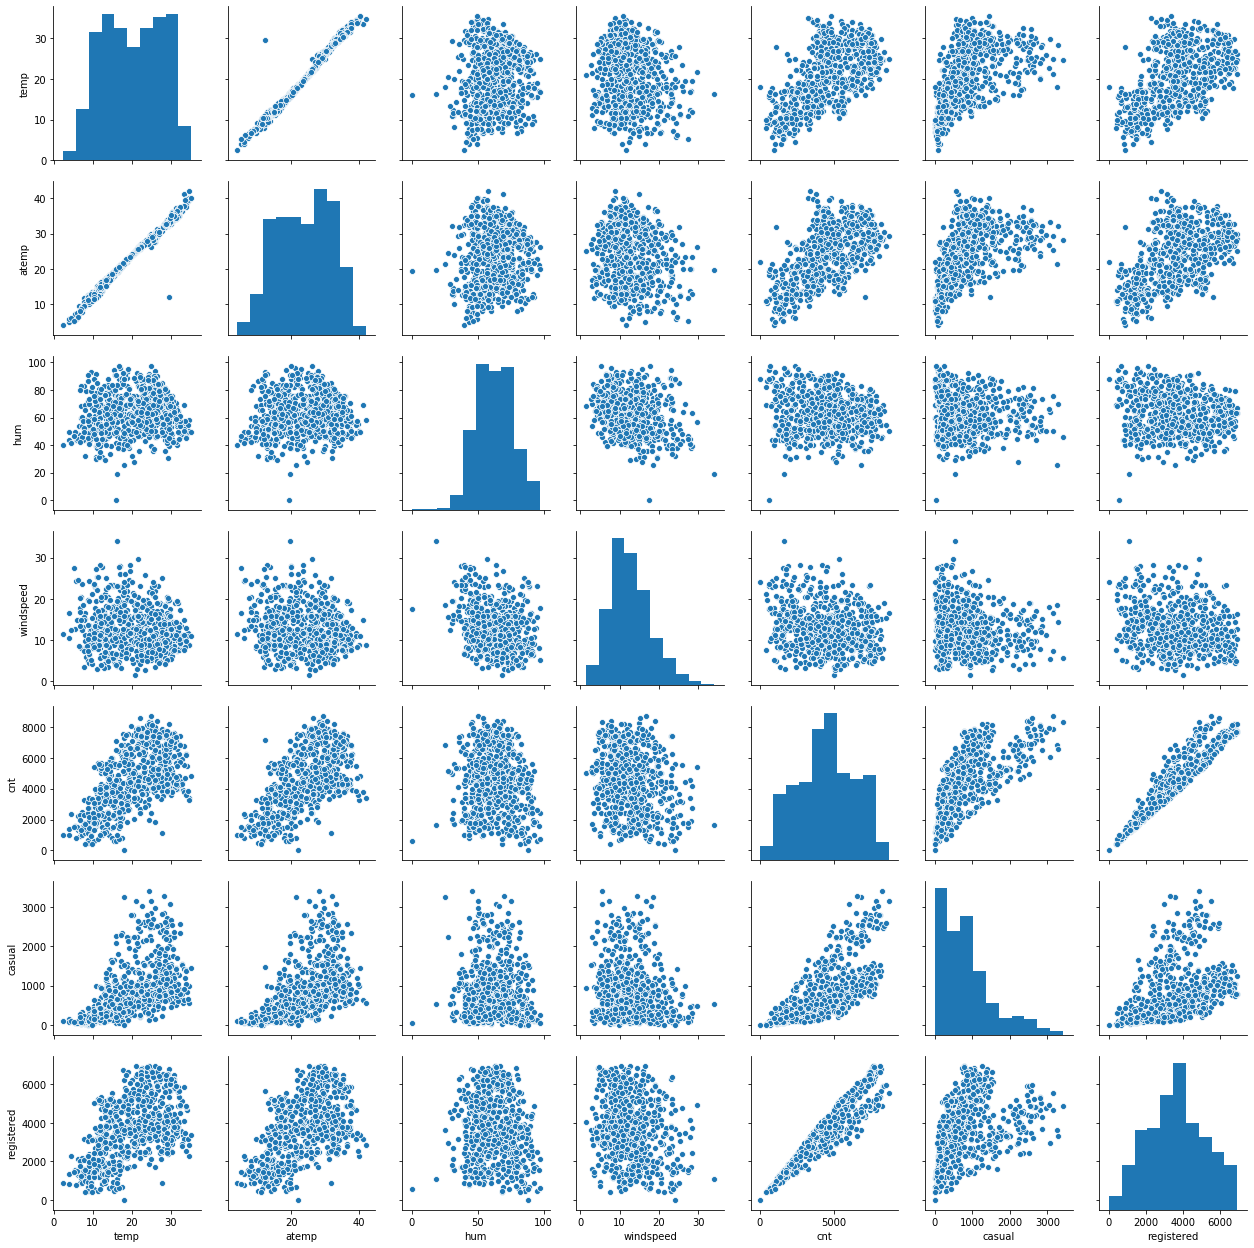

In [193]:
num=dfday[['temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered']]
sns.pairplot(num)
plt.show()

Observations from above pairplot:
1. 'temp' and 'atemp' columns are highly correlated with 'cnt'
2. 'casual' and 'registered' columns are highly correlated with 'cnt'

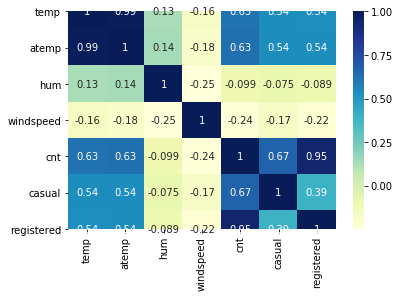

In [194]:
#Correlations for numeric variables
cor=num.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

**Visualising Categorical variables.
Boxplot of categorical variables**

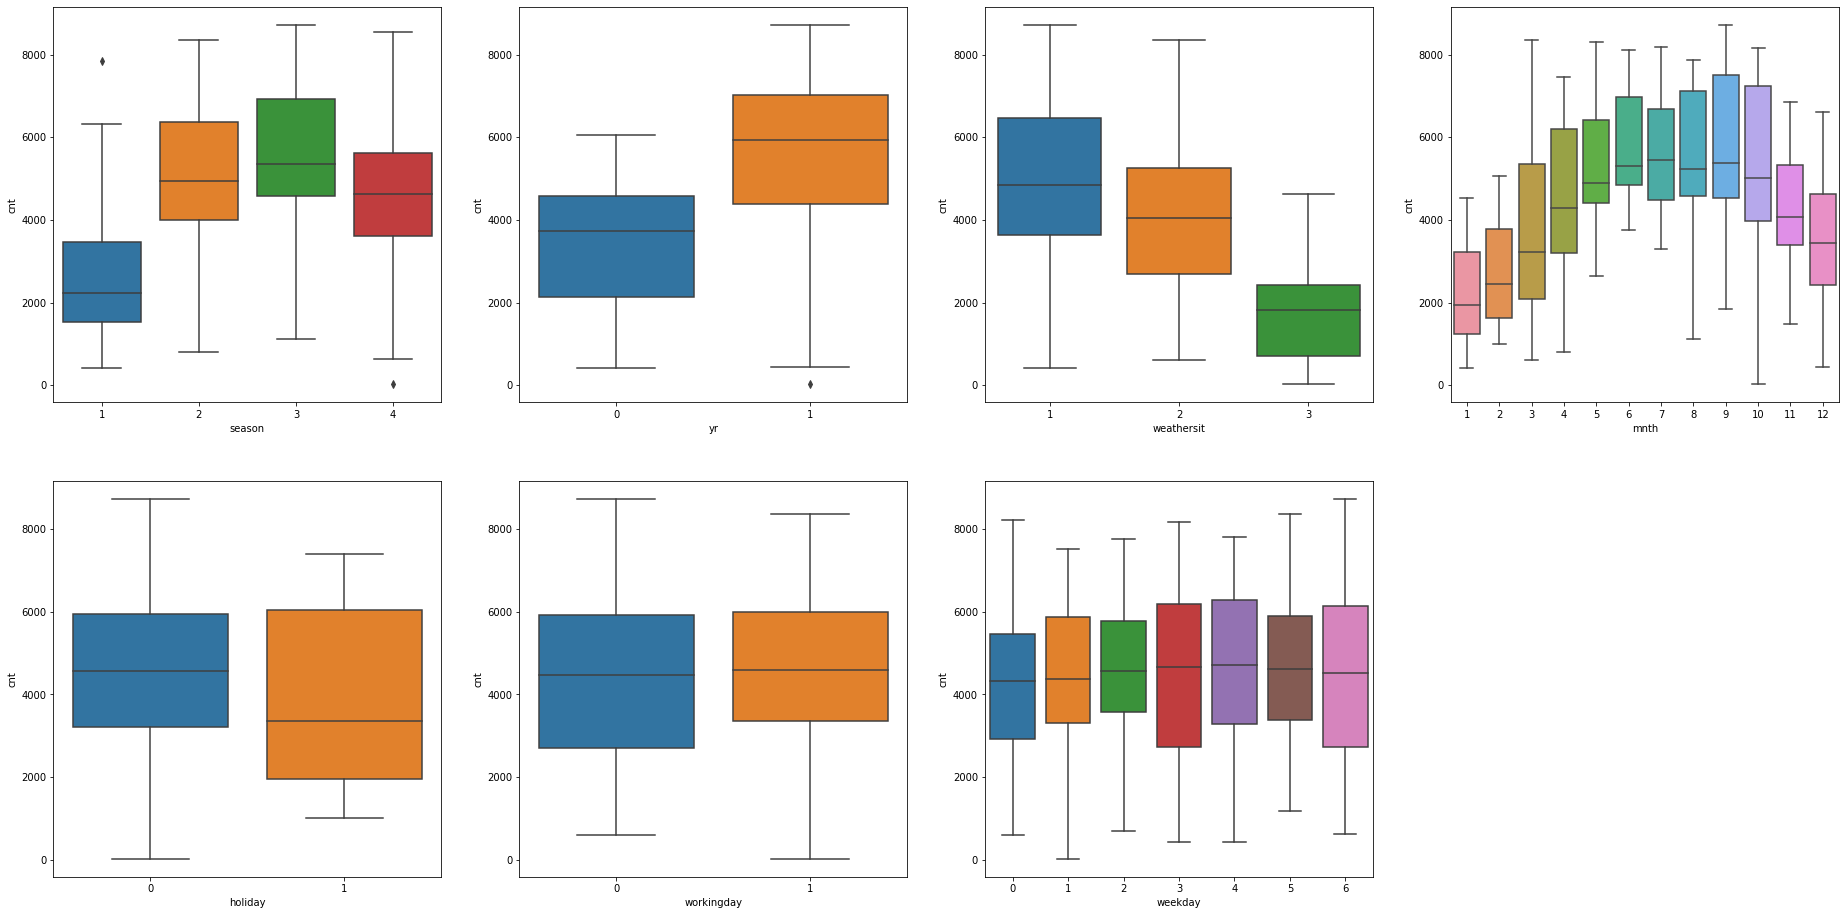

In [195]:
plt.figure(figsize=(32,16))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = dfday)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dfday)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dfday)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = dfday)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = dfday)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dfday)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = dfday)

plt.show()

Observations from above boxplots of categorical variables:

1. The year box plots indicates that more bikes are rent during 2019.
2. The season box plots indicates that more bikes are rent during fall season.
3. The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.
4. The month box plots indicates that more bikes are rent during september month.
5. The weekday box plots indicates that more bikes are rent during saturday.
6. The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

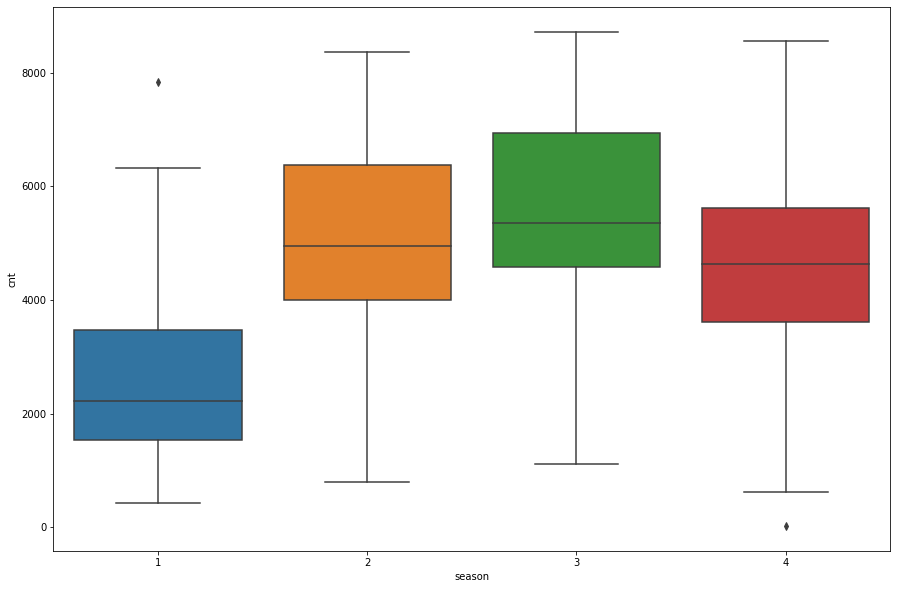

In [196]:
plt.figure(figsize=(15,10))
sns.boxplot(x='season', y='cnt',data=dfday)
plt.show()

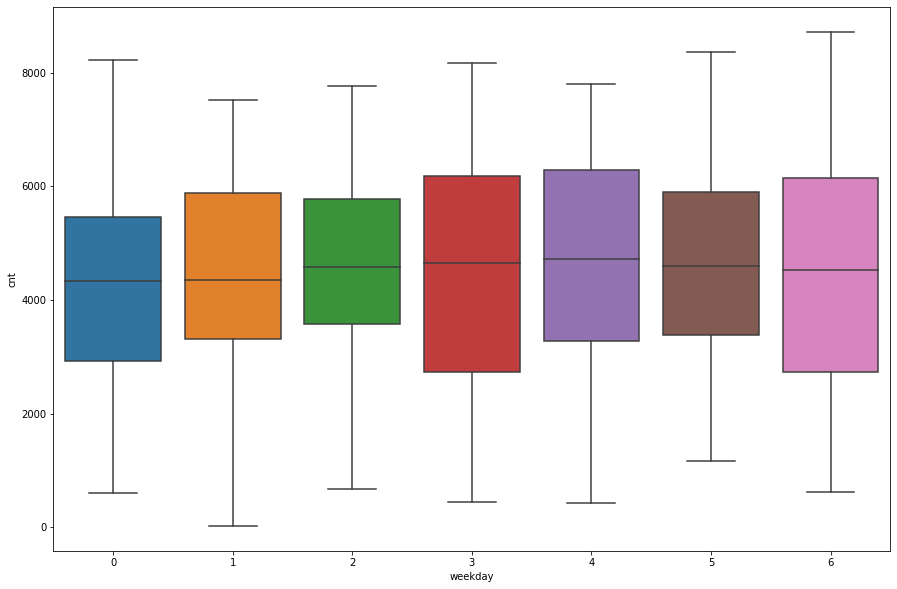

In [197]:
plt.figure(figsize=(15,10))
sns.boxplot(x='weekday', y='cnt',data=dfday)
plt.show()

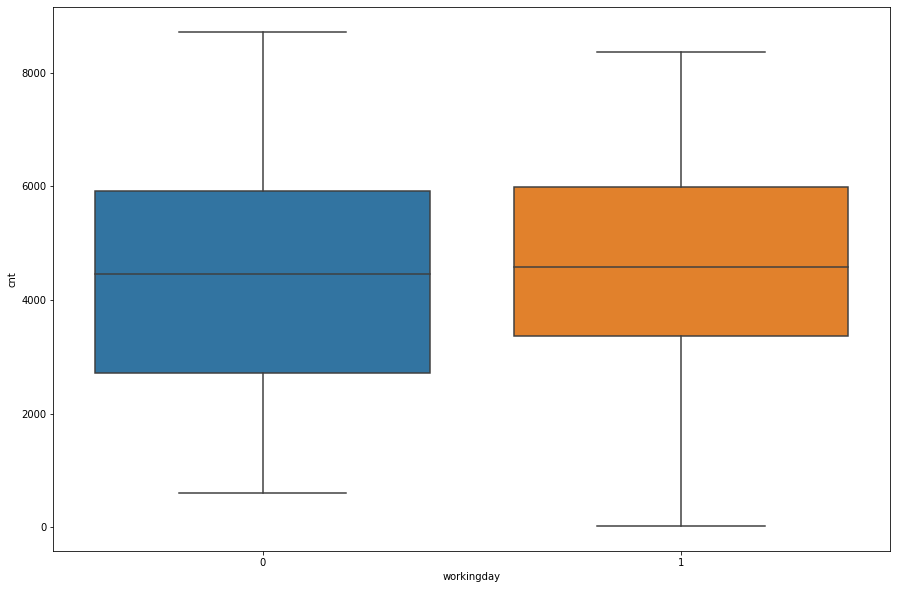

In [198]:
plt.figure(figsize=(15,10))
sns.boxplot(x='workingday', y='cnt',data=dfday)
plt.show()

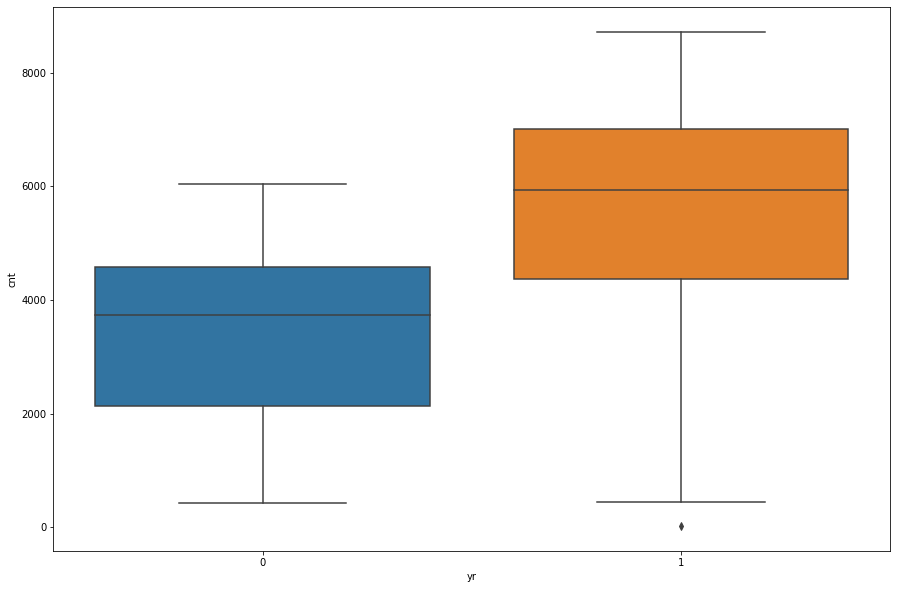

In [199]:
plt.figure(figsize=(15,10))
sns.boxplot(x='yr', y='cnt',data=dfday)
plt.show()

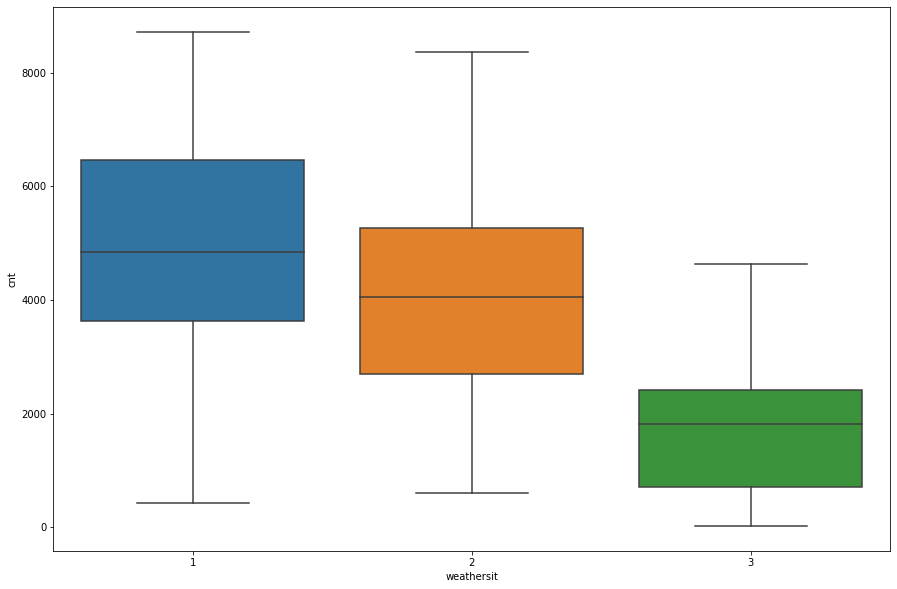

In [200]:
plt.figure(figsize=(15,10))
sns.boxplot(x='weathersit', y='cnt',data=dfday)
plt.show()

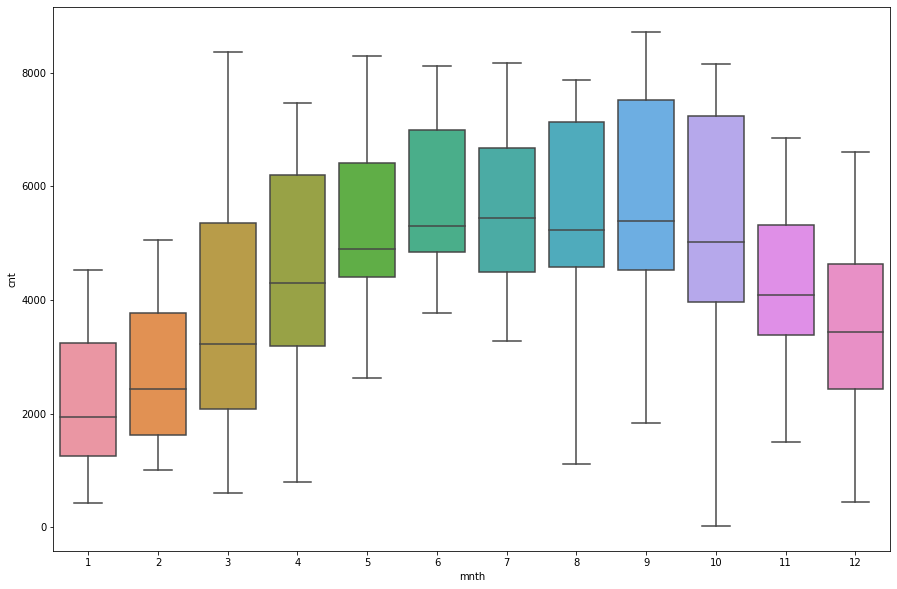

In [201]:
plt.figure(figsize=(15,10))
sns.boxplot(x='mnth', y='cnt',data=dfday)
plt.show()

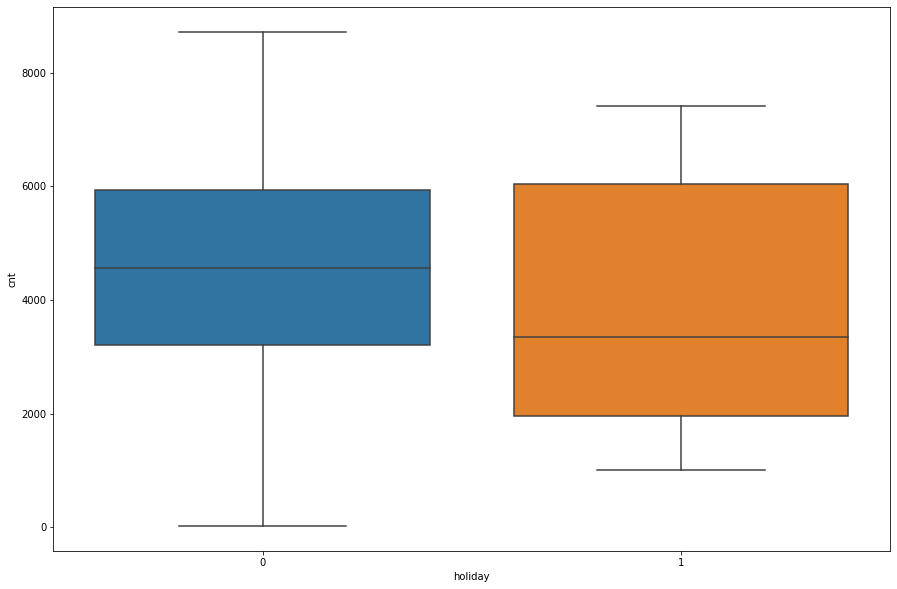

In [202]:
plt.figure(figsize=(15,10))
sns.boxplot(x='holiday', y='cnt',data=dfday)
plt.show()

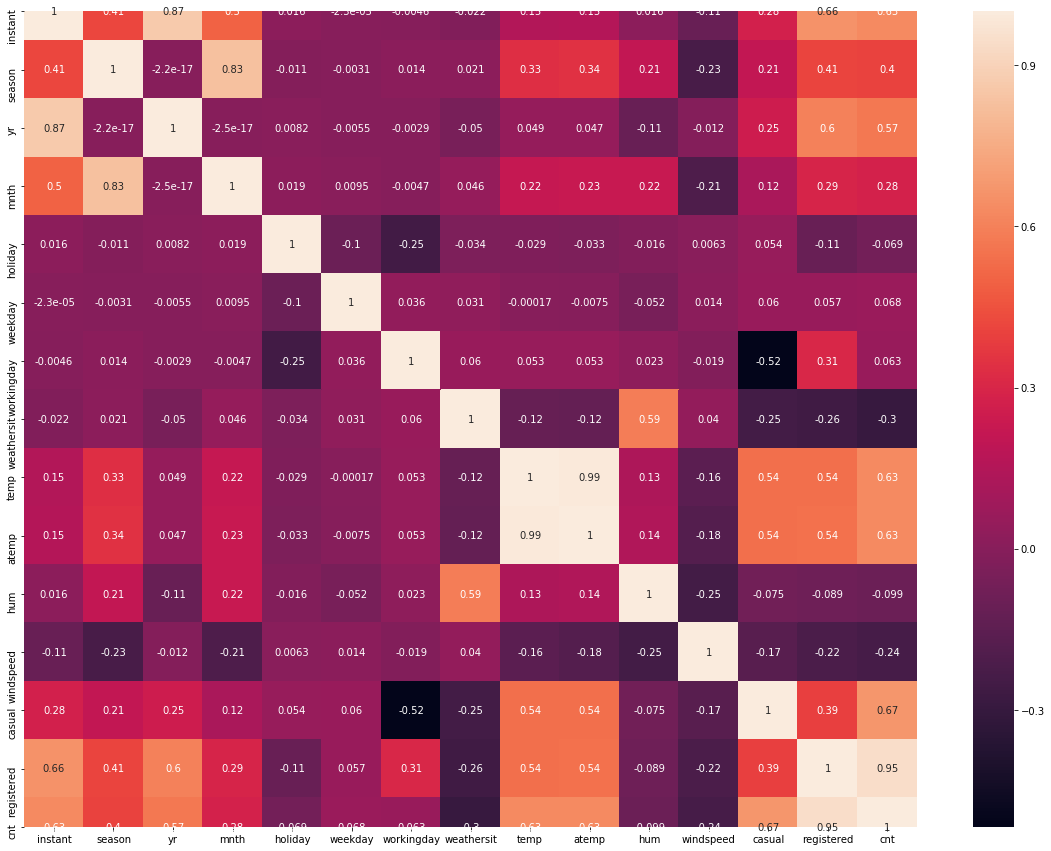

In [203]:
plt.figure(figsize=(20,15))
sns.heatmap(dfday.corr(), annot = True, color='c')

plt.show()

## EDA

Dropping the unnecessary columns "instant","dteday","casual","registered".As casual and registered are collinear with each other.

In [204]:
dfday=dfday.drop(['instant','dteday','casual','registered'],axis=1)
dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [205]:
dfday.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Data Preparation

**Changing the data type of categorical variables from int to object**

In [206]:
dfday["season"]=dfday["season"].astype(str)
dfday["mnth"]=dfday["mnth"].astype(str)
dfday["weekday"]=dfday["weekday"].astype(str)
dfday["weathersit"]=dfday["weathersit"].astype(str)

In [207]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [208]:
dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Creating Dummy variables

## Dummy creation for column "Season

In [209]:
# List of variables to map
def binary_map(x):
    return x.map({'1':'Spring','2':'Summer','3':'Fall','4':'Winter'})

dfday['season'] = dfday[['season']].apply(binary_map)

dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [210]:
# Get the dummy variables for the 'season' and stored in a new variable 'status1'
status1=pd.get_dummies(dfday['season'],drop_first=True)
status1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [211]:
# Adding the results to the original 'dfday' dataframe
dfday=pd.concat([dfday, status1],axis=1)
dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


## Dummy creation for column "mnth

In [212]:
# List of variables to map
def binary_map(x):
    return x.map({'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'})

dfday['mnth'] = dfday[['mnth']].apply(binary_map)

dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [213]:
# Get the dummy variables for the 'mnth' and stored in a new variable 'status2'
status2=pd.get_dummies(dfday['mnth'],drop_first=True)
status2.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [214]:
# Adding the results to the original 'dfday' dataframe
dfday=pd.concat([dfday, status2],axis=1)
dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


# Dummies creation for column "weekday"

In [215]:
def binary_map(x):
    return x.map({'0':'sunday','1':'monday','2':'tuesday','3':'wednesday','4':'thursday','5':'friday','6':'saturday'})

dfday['weekday'] = dfday[['weekday']].apply(binary_map)
dfday.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,Jan,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Spring,0,Jan,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [216]:
# Get the dummy variables for the 'weekday' and stored in a new variable 'status3'
status3=pd.get_dummies(dfday['weekday'],drop_first=True)
status3.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [217]:
# Adding the results to the original 'dfday' dataframe
dfday=pd.concat([dfday, status3],axis=1)
dfday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,Spring,0,Jan,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Spring,0,Jan,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Spring,0,Jan,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Spring,0,Jan,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# Dummy creation for column "weathersit"

In [218]:
def binary_map(x):
    return x.map({'1':'Clear','2':'Mist','3':'Light','4':'Heavy'})

dfday['weathersit'] = dfday[['weathersit']].apply(binary_map)
dfday.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,Spring,0,Jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Spring,0,Jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [219]:
# Get the dummy variables for the 'weathersit' and stored in a new variable 'status4'
status4=pd.get_dummies(dfday['weathersit'], drop_first=True)
status4.head()

,Light,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [220]:
# Adding the results to the original 'dfday' dataframe
dfday=pd.concat([dfday, status4],axis=1)
dfday.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
0,Spring,0,Jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [221]:
dfday.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
0,Spring,0,Jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [222]:
#dropping the original 'season','mnth','weekday','weathersit' columns from the dfday dataframe
dfday.drop(columns=['season', 'mnth', 'weekday','weathersit'], inplace=True)
dfday.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [223]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
Spring        730 non-null uint8
Summer        730 non-null uint8
Winter        730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
Jul           730 non-null uint8
Jun           730 non-null uint8
Mar           730 non-null uint8
May           730 non-null uint8
Nov           730 non-null uint8
Oct           730 non-null uint8
Sep           730 non-null uint8
monday        730 non-null uint8
saturday      730 non-null uint8
sunday        730 non-null uint8
thursday      730 non-null uint8
tuesday       730 non-null ui

In [224]:
dfday.shape

(730, 30)

# Step 2: Splitting Data into Training and Test data

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dfday, train_size = 0.7, random_state = 100)

In [227]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [228]:
df_train.shape

(510, 30)

In [229]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [230]:
df_test.shape

(220, 30)

# Rescaling the features. Let's use MinMax Scaling

In [231]:
from sklearn.preprocessing import MinMaxScaler

In [232]:
#instantiating an object
scaler = MinMaxScaler()

In [233]:
#Applying scaler() to all the columns except the 'dummy' and categorical variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [234]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [235]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


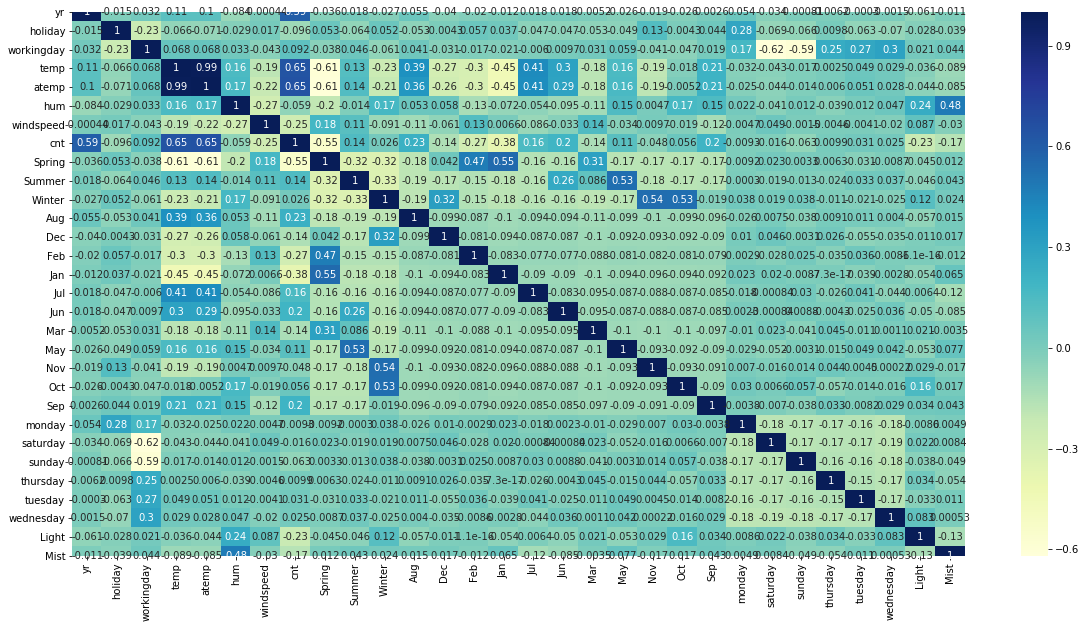

In [236]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above heatmap, it is observed that yr, temp and atemp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt and atemp vs cnt.

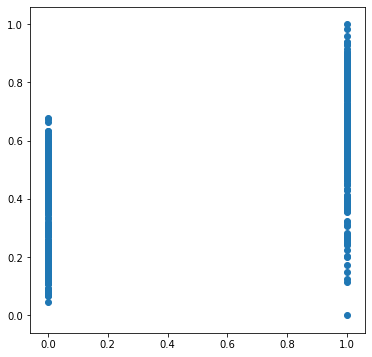

In [237]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.yr, df_train.cnt)
plt.show()

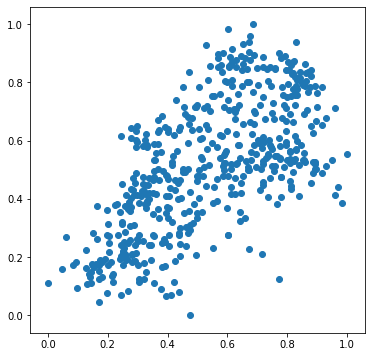

In [238]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


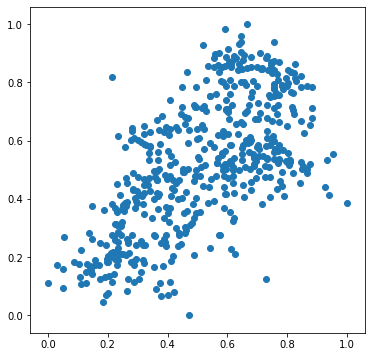

In [239]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

# Dividing into X and Y sets for the model building

In [240]:
y_train = df_train.pop('cnt')
X_train = df_train

In [241]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


X_train contains all rows except 'cnt'

In [242]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

y_train contains just the 'cnt' column

In [243]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
yr            510 non-null int64
holiday       510 non-null int64
workingday    510 non-null int64
temp          510 non-null float64
atemp         510 non-null float64
hum           510 non-null float64
windspeed     510 non-null float64
Spring        510 non-null uint8
Summer        510 non-null uint8
Winter        510 non-null uint8
Aug           510 non-null uint8
Dec           510 non-null uint8
Feb           510 non-null uint8
Jan           510 non-null uint8
Jul           510 non-null uint8
Jun           510 non-null uint8
Mar           510 non-null uint8
May           510 non-null uint8
Nov           510 non-null uint8
Oct           510 non-null uint8
Sep           510 non-null uint8
monday        510 non-null uint8
saturday      510 non-null uint8
sunday        510 non-null uint8
thursday      510 non-null uint8
tuesday       510 non-null uint8
wednesday     510 non-null 

# Building a linear model

# RFE(Recursive Feature Elimination)

In [244]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFEs
from sklearn.linear_model import LinearRegression

In [245]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [246]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [247]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'saturday', 'Light', 'Mist'],
      dtype='object')

In [248]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [249]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
yr            510 non-null int64
holiday       510 non-null int64
workingday    510 non-null int64
temp          510 non-null float64
atemp         510 non-null float64
hum           510 non-null float64
windspeed     510 non-null float64
Spring        510 non-null uint8
Summer        510 non-null uint8
Winter        510 non-null uint8
Aug           510 non-null uint8
Dec           510 non-null uint8
Feb           510 non-null uint8
Jan           510 non-null uint8
Jul           510 non-null uint8
Jun           510 non-null uint8
Mar           510 non-null uint8
May           510 non-null uint8
Nov           510 non-null uint8
Oct           510 non-null uint8
Sep           510 non-null uint8
monday        510 non-null uint8
saturday      510 non-null uint8
sunday        510 non-null uint8
thursday      510 non-null uint8
tuesday       510 non-null uint8
wednesday     510 non-null 

# Building model using statsmodel, for the detailed statistics

## Model 1:

In [250]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [251]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [252]:
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jan,Jul,Sep,saturday,Light,Mist
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [253]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [254]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        10:14:55   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer         0.0508      0.015      3.423      0.001       0.022       0.080
Winter         0.0933      0.017      5.403      0.000       0.059       0.127
Jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep            0.0814      0.016      4.945      0.000       0.049       0.114
saturday       0.0536      0.014      3.694      0.000       0.025       0.082
Light         -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'saturday', 'Light',
       'Mist'],
      dtype='object')

In [256]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [257]:
# Calculate the VIFs for the above model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif




,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.46
7,Summer,2.85
14,Mist,2.29
0,yr,2.09
12,saturday,1.98


In [258]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'saturday', 'Light', 'Mist'],
      dtype='object')

# Model 2
"Jan" column seems to be insignificant in presence of other variables, so we can drop this column.
Now, let's rebuild the model without "Jan"

In [259]:
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

In [260]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [261]:
lm_1 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [262]:
lm_1.params

const         0.240163
yr            0.229763
holiday      -0.059083
workingday    0.043033
temp          0.527708
hum          -0.161086
windspeed    -0.180875
Spring       -0.055546
Summer        0.053733
Winter        0.099214
Jul          -0.054616
Sep           0.081983
saturday      0.053031
Light        -0.245009
Mist         -0.056344
dtype: float64

In [263]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.11e-191
Time:                        10:14:59   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.000       0.170       0.310
yr             0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday     0.0430      0.012      3.725      0.000       0.020       0.066
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
Spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
Summer         0.0537      0.015      3.631      0.000       0.025       0.083
Winter         0.0992      0.017      5.815      0.000       0.066       0.133
Jul           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep            0.0820      0.017      4.966      0.000       0.050       0.114
saturday       0.0530      0.015      3.648      0.000       0.024       0.082
Light         -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [265]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,Spring,4.24
8,Winter,3.42
7,Summer,2.85
13,Mist,2.29
0,yr,2.08
11,saturday,1.97


In [266]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jul', 'Sep', 'saturday', 'Light', 'Mist'],
      dtype='object')

# Model 3:
We can drop "hum" column due to its highest VIF value above.
Let's rebuild the model without "hum" column

In [267]:
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

In [268]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new1 = sm.add_constant(X_train_new1)

In [269]:
lm_2 = sm.OLS(y_train,X_train_new1).fit()   # Running the linear model

In [270]:
lm_2.params

const         0.157559
yr            0.233727
holiday      -0.056739
workingday    0.046120
temp          0.491531
windspeed    -0.149066
Spring       -0.065505
Summer        0.047677
Winter        0.084588
Jul          -0.049633
Sep           0.075934
saturday      0.057877
Light        -0.289513
Mist         -0.082161
dtype: float64

In [271]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.28e-188
Time:                        10:15:01   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.031      5.126      0.000       0.097       0.218
yr             0.2337      0.008     28.828      0.000       0.218       0.250
holiday       -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday     0.0461      0.012      3.931      0.000       0.023       0.069
temp           0.4915      0.033     15.027      0.000       0.427       0.556
windspeed     -0.1491      0.025     -6.024      0.000      -0.198      -0.100
Spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
Summer         0.0477      0.015      3.180      0.002       0.018       0.077
Winter         0.0846      0.017      4.971      0.000       0.051       0.118
Jul           -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep            0.0759      0.017      4.537      0.000       0.043       0.109
saturday       0.0579      0.015      3.924      0.000       0.029       0.087
Light         -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist          -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
X_train_new1 = X_train_new1.drop(['const'], axis=1)

In [273]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,Spring,2.49
6,Summer,2.34
0,yr,2.07
7,Winter,1.98
10,saturday,1.96
8,Jul,1.58
12,Mist,1.57


In [274]:
X_train_new1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Jul', 'Sep', 'saturday', 'Light', 'Mist'],
      dtype='object')

# Model 4:
Let's rebuild the model without "holiday" column



In [275]:
X_train_new2 = X_train_new1.drop(["holiday"], axis = 1)

In [276]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new2 = sm.add_constant(X_train_new2)

In [277]:
lm_3 = sm.OLS(y_train,X_train_new2).fit()   # Running the linear model

In [278]:
lm_3.params

const         0.149243
yr            0.233901
workingday    0.054531
temp          0.491976
windspeed    -0.149935
Spring       -0.066433
Summer        0.048061
Winter        0.083810
Jul          -0.048584
Sep           0.074009
saturday      0.066385
Light        -0.288317
Mist         -0.081652
dtype: float64

In [279]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.12e-189
Time:                        10:15:04   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.000       0.089       0.209
yr             0.2339      0.008     28.756      0.000       0.218       0.250
workingday     0.0545      0.011      4.938      0.000       0.033       0.076
temp           0.4920      0.033     14.991      0.000       0.427       0.556
windspeed     -0.1499      0.025     -6.040      0.000      -0.199      -0.101
Spring        -0.0664      0.021     -3.182      0.002      -0.107      -0.025
Summer         0.0481      0.015      3.196      0.001       0.019       0.078
Winter         0.0838      0.017      4.910      0.000       0.050       0.117
Jul           -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep            0.0740      0.017      4.414      0.000       0.041       0.107
saturday       0.0664      0.014      4.671      0.000       0.038       0.094
Light         -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Mist          -0.0817      0.009     -9.428      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [281]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,Spring,2.38
5,Summer,2.32
0,yr,2.07
6,Winter,1.91
9,saturday,1.83
7,Jul,1.58
11,Mist,1.57


In [282]:
X_train_new2.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'Jul', 'Sep', 'saturday', 'Light', 'Mist'],
      dtype='object')

# Model 5:
Let's drop "workingday" column and rebild the model

In [283]:
X_train_new3 = X_train_new2.drop(['workingday'], axis=1)

In [284]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new3 = sm.add_constant(X_train_new3)

In [285]:
lm_4 = sm.OLS(y_train,X_train_new3).fit()   # Running the linear model

In [286]:
lm_4.params

const        0.193486
yr           0.234415
temp         0.493534
windspeed   -0.151913
Spring      -0.069280
Summer       0.047234
Winter       0.079120
Jul         -0.051523
Sep          0.073266
saturday     0.022892
Light       -0.280719
Mist        -0.078651
dtype: float64

In [287]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.54e-185
Time:                        10:15:06   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1935      0.030      6.468      0.000       0.135       0.252
yr             0.2344      0.008     28.168      0.000       0.218       0.251
temp           0.4935      0.034     14.698      0.000       0.428       0.560
windspeed     -0.1519      0.025     -5.982      0.000      -0.202      -0.102
Spring        -0.0693      0.021     -3.244      0.001      -0.111      -0.027
Summer         0.0472      0.015      3.070      0.002       0.017       0.077
Winter         0.0791      0.017      4.537      0.000       0.045       0.113
Jul           -0.0515      0.019     -2.734      0.006      -0.089      -0.015
Sep            0.0733      0.017      4.271      0.000       0.040       0.107
saturday       0.0229      0.011      2.006      0.045       0.000       0.045
Light         -0.2807      0.025    -11.246      0.000      -0.330      -0.232
Mist          -0.0787      0.009     -8.897      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.531   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.911
Skew:                          -0.792   Prob(JB):                     3.84e-39
Kurtosis:                       5.412   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
X_train_new3 = X_train_new3.drop(['const'], axis=1)

In [289]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,Summer,2.23
3,Spring,2.08
0,yr,2.07
5,Winter,1.78
6,Jul,1.58
10,Mist,1.55
7,Sep,1.33
8,saturday,1.18


# Model 6:
Let's drop "saturday" column and rebuild the model

In [290]:
X_train_new4 = X_train_new3.drop(['saturday'], axis=1)

In [291]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new4 = sm.add_constant(X_train_new4)

In [292]:
lm_5 = sm.OLS(y_train,X_train_new4).fit()   # Running the linear model

In [293]:
lm_5.params

const        0.197399
yr           0.233941
temp         0.491952
windspeed   -0.149628
Spring      -0.069553
Summer       0.046881
Winter       0.079169
Jul         -0.050958
Sep          0.073354
Light       -0.280038
Mist        -0.078473
dtype: float64

In [294]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.00e-185
Time:                        10:15:09   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1974      0.030      6.593      0.000       0.139       0.256
yr             0.2339      0.008     28.037      0.000       0.218       0.250
temp           0.4920      0.034     14.611      0.000       0.426       0.558
windspeed     -0.1496      0.025     -5.880      0.000      -0.200      -0.100
Spring        -0.0696      0.021     -3.247      0.001      -0.112      -0.027
Summer         0.0469      0.015      3.038      0.003       0.017       0.077
Winter         0.0792      0.017      4.527      0.000       0.045       0.114
Jul           -0.0510      0.019     -2.697      0.007      -0.088      -0.014
Sep            0.0734      0.017      4.263      0.000       0.040       0.107
Light         -0.2800      0.025    -11.186      0.000      -0.329      -0.231
Mist          -0.0785      0.009     -8.851      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       69.942   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.479
Skew:                          -0.711   Prob(JB):                     9.57e-38
Kurtosis:                       5.450   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
X_train_new4 = X_train_new4.drop(['const'], axis=1)

In [296]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,Summer,2.23
0,yr,2.07
3,Spring,2.07
5,Winter,1.77
6,Jul,1.58
9,Mist,1.55
7,Sep,1.33
8,Light,1.08


In [297]:
X_train_new4.columns

Index(['yr', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter', 'Jul', 'Sep',
       'Light', 'Mist'],
      dtype='object')

# Model 7:
Let's drop "windspeed" column and rebuild the model

In [298]:
X_train_new5 = X_train_new4.drop(['windspeed'], axis=1)

In [299]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new5 = sm.add_constant(X_train_new5)

In [300]:
lm_6 = sm.OLS(y_train,X_train_new5).fit()   # Running the linear model

In [301]:
lm_6.params

const     0.147400
yr        0.232968
temp      0.504048
Spring   -0.079155
Summer    0.036939
Winter    0.080246
Jul      -0.051210
Sep       0.077640
Light    -0.294838
Mist     -0.076695
dtype: float64

In [302]:
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.15e-179
Time:                        10:15:11   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1474      0.030      4.971      0.000       0.089       0.206
yr             0.2330      0.009     27.033      0.000       0.216       0.250
temp           0.5040      0.035     14.519      0.000       0.436       0.572
Spring        -0.0792      0.022     -3.588      0.000      -0.123      -0.036
Summer         0.0369      0.016      2.331      0.020       0.006       0.068
Winter         0.0802      0.018      4.442      0.000       0.045       0.116
Jul           -0.0512      0.020     -2.623      0.009      -0.090      -0.013
Sep            0.0776      0.018      4.372      0.000       0.043       0.113
Light         -0.2948      0.026    -11.459      0.000      -0.345      -0.244
Mist          -0.0767      0.009     -8.378      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       72.225   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.589
Skew:                          -0.730   Prob(JB):                     2.74e-39
Kurtosis:                       5.496   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
X_train_new5 = X_train_new5.drop(['const'], axis=1)

In [304]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.21
0,yr,2.06
3,Summer,1.94
5,Jul,1.58
4,Winter,1.56
8,Mist,1.55
2,Spring,1.38
6,Sep,1.33
7,Light,1.06


In [305]:
X_train_new5.columns

Index(['yr', 'temp', 'Spring', 'Summer', 'Winter', 'Jul', 'Sep', 'Light',
       'Mist'],
      dtype='object')

In [306]:
# We can observe that all the columns have VIF value less than 5 now

# Residual Analysis of the train data
Linear regression has an assumption that Error terms are normally distributed.
For depicting this kind of distribution of error terms, let's plot a histogram for the error terms and make further observations.

In [307]:
X_train_new5.shape

(510, 9)

In [308]:
X_train_new5.head()

,yr,temp,Spring,Summer,Winter,Jul,Sep,Light,Mist
576,1,0.815169,0,0,0,1,0,0,0
426,1,0.442393,1,0,0,0,0,0,1
728,1,0.245101,1,0,0,0,0,0,0
482,1,0.395666,0,1,0,0,0,0,1
111,0,0.345824,0,1,0,0,0,0,1


In [309]:
X_train_new5 = sm.add_constant(X_train_new5)

In [310]:
y_train_cnt = lm_6.predict(X_train_new5)

In [311]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

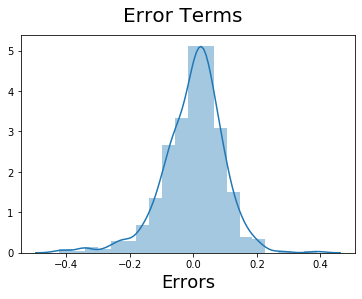

In [312]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)        

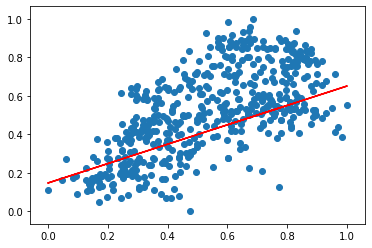

In [313]:
plt.scatter(X_train_new5.iloc[:,2],y_train)
plt.plot(X_train_new5.iloc[:,2],0.147+0.504*X_train_new5.iloc[:,2],'r')
plt.show()

# Making Predictions on the basis of Final Model

#### Applying the scaling on the test sets

In [163]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [164]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X_test and y_test

In [165]:
y_test = df_test.pop('cnt')
X_test = df_test

In [166]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,Light,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [167]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [168]:
X_train_new5.columns

Index(['const', 'yr', 'temp', 'Spring', 'Summer', 'Winter', 'Jul', 'Sep',
       'Light', 'Mist'],
      dtype='object')

In [169]:
X_train_new5 = X_train_new5.drop(['const'], axis=1)

In [170]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

In [171]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [172]:
X_test_new.head()

,const,yr,temp,Spring,Summer,Winter,Jul,Sep,Light,Mist
184,1.0,0,0.831783,0,0,0,1,0,0,1
535,1.0,1,0.901354,0,1,0,0,0,0,0
299,1.0,0,0.511964,0,0,1,0,0,0,1
221,1.0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0.817246,0,1,0,0,0,0,0


In [173]:
# Making predictions
y_test_pred = lm_6.predict(X_test_new)

In [174]:
y_test_pred.head()

184    0.438754
535    0.871633
299    0.409006
221    0.591782
152    0.596270
dtype: float64

In [175]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test ,y_pred=y_test_pred)

0.8082117653777107

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

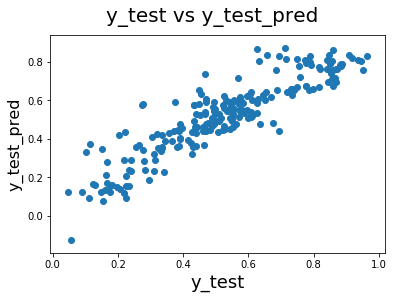

In [176]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16) 

We can see that the equation of our best fitted line is:

$ cnt = 0.2330 \times  yr  +  0.5040 \times  temp -  0.0792 \times  season_spring +  0.0369 \times season_summer + 0.0802 \times season_winter - 0.0512 \times july + 0.0776 \times september - 0.0767 \times weathersit_2  - 0.2948 \times weathersit_3 $